# Tests illustration

In [1]:
using HomogeneousManifoldTesting

In [2]:
sample_size = 100
mc_size = 1000
vect_prop_near_neigh = [0.1,0.2,0.5,1];

## 1) On the circle

In [3]:
test_circle = Test_Homogeneity(sample_size,vect_prop_near_neigh,mc_size,CircleData);

1

### A) Uniform sample

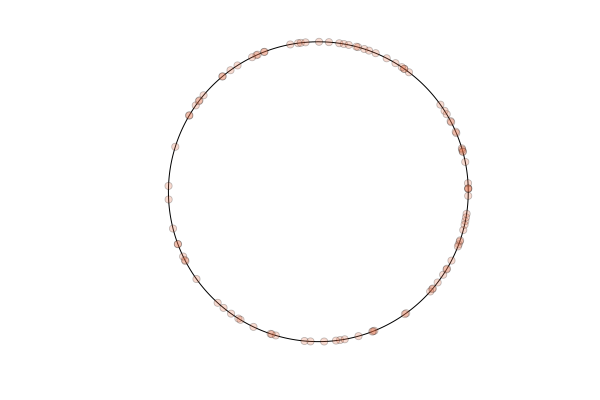

In [4]:
sample_uniform = CircleData(sample_size,"uniform")
plot_data(sample_uniform,0.25)

#### 1) Test of homogeneity

This test tests that the points are at least as homogenely spread on the circle as would be an iid sample from the uniform distribution. The best possible configuration would be a regular grid on the circle. For such a grid, the test would never reject.

In [5]:
res_test_hom = apply_test(test_circle,sample_uniform,"homogeneity")

2-element Vector{Vector{Float64}}:
 [0.573, 0.196, 0.085, 0.065]
 [0.04764536583918651, 0.07997154658156976, 0.1441163617004462, 0.12051226517803472]

In [6]:
for i in 1:length(vect_prop_near_neigh)
    print("The p-value for the test with parameter h = $(vect_prop_near_neigh[i]) is $(res_test_hom[1][i])\n")
end
print("\n")
for i in 1:length(vect_prop_near_neigh)
    print("The statistic for the test with parameter h = $(vect_prop_near_neigh[i]) is $(res_test_hom[2][i])\n")
end

The p-value for the test with parameter h = 0.1 is 0.573
The p-value for the test with parameter h = 0.2 is 0.196
The p-value for the test with parameter h = 0.5 is 0.085
The p-value for the test with parameter h = 1.0 is 0.065

The statistic for the test with parameter h = 0.1 is 0.04764536583918651
The statistic for the test with parameter h = 0.2 is 0.07997154658156976
The statistic for the test with parameter h = 0.5 is 0.1441163617004462
The statistic for the test with parameter h = 1.0 is 0.12051226517803472


#### 2) Test of iidness

This test tests that the points are an iid sample from the uniform distribution on the circle. For instance the points on a regular grid on the sphere are not independant, so, the test would always reject.

In [7]:
res_test_iid = apply_test(test_circle,sample_uniform,"iidness")

2-element Vector{Vector{Float64}}:
 [0.715, 0.404, 0.092, 0.068]
 [0.01203186539187196, 0.025659013264894875, 0.07262555443802685, 0.0669797428189791]

In [8]:
for i in 1:length(vect_prop_near_neigh)
    print("The p-value for the test with parameter h = $(vect_prop_near_neigh[i]) is $(res_test_iid[1][i])\n")
end
print("\n")
for i in 1:length(vect_prop_near_neigh)
    print("The statistic for the test with parameter h = $(vect_prop_near_neigh[i]) is $(res_test_iid[2][i])\n")
end

The p-value for the test with parameter h = 0.1 is 0.715
The p-value for the test with parameter h = 0.2 is 0.404
The p-value for the test with parameter h = 0.5 is 0.092
The p-value for the test with parameter h = 1.0 is 0.068

The statistic for the test with parameter h = 0.1 is 0.01203186539187196
The statistic for the test with parameter h = 0.2 is 0.025659013264894875
The statistic for the test with parameter h = 0.5 is 0.07262555443802685
The statistic for the test with parameter h = 1.0 is 0.0669797428189791


### B) Grid alternative

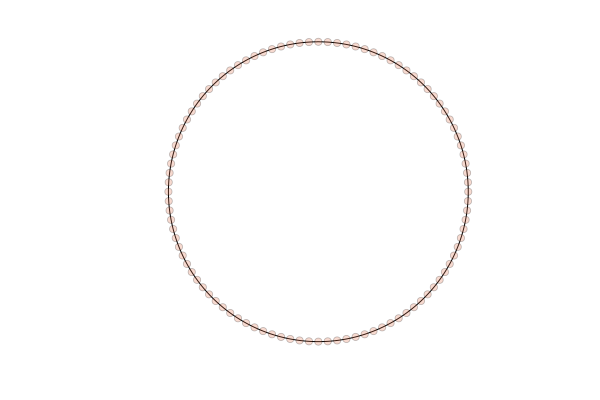

In [9]:
sample_grid = CircleData(sample_size,"dynamical system",2*π/sample_size,0)
plot_data(sample_grid,0.25)

#### 1) Test of homogeneity

The p-values are equal to 1 for the test of homogeneity. Homogeneity is never rejected, no matter the parameter $h$.

In [10]:
apply_test(test_circle,sample_grid,"homogeneity")

2-element Vector{Vector{Float64}}:
 [1.0, 1.0, 1.0, 1.0]
 [0.025665900800614788, 0.023943450933242367, 0.018498958739123005, 0.009319870695549416]

#### 2) Test of iidness

The p-values are equal or close to 0 for the test of iidness. Hypothesis $H_0$ is rejected. The points are not an iid sample from the uniform distribution on the circle.

In [11]:
apply_test(test_circle,sample_grid,"iidness")

2-element Vector{Vector{Float64}}:
 [0.0, 0.002, 0.04, 0.057]
 [0.06147005368820031, 0.07816379919116132, 0.09531992573856718, 0.07143227983443995]

### C) Fisher von Mises alternative

┌ Warning: RCall.jl: Le chargement a nécessité le package : Rcpp
└ @ RCall /home/claire/.julia/packages/RCall/0ggIQ/src/io.jl:172


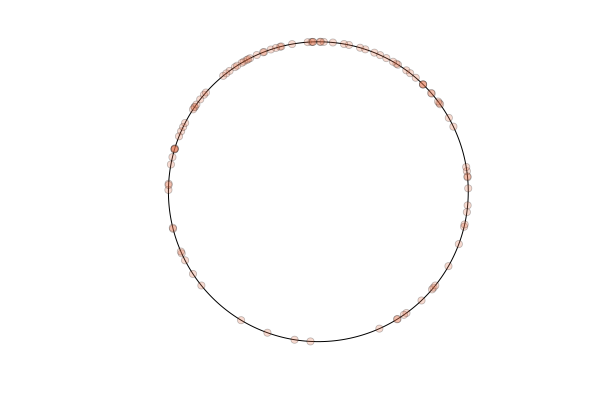

In [12]:
sample_alternative = CircleData(sample_size,"FvM",1,[0,1])
plot_data(sample_alternative,0.25)

For both tests, the p-values are equal to 0, the sample is neither homogeneous on the circle, nor an iid sample from the uniform distribution on the circle.

In [13]:
apply_test(test_circle,sample_alternative,"homogeneity")

2-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0]
 [0.08478913958783262, 0.146148799150292, 0.2762151932539671, 0.2636333093977292]

In [14]:
apply_test(test_circle,sample_alternative,"iidness")

2-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0]
 [0.06373055873720684, 0.10900254087985851, 0.22614123947606146, 0.23366135877459124]

## 2) On the sphere

In [15]:
test_sphere = Test_Homogeneity(sample_size,vect_prop_near_neigh,mc_size,SphereData);

1

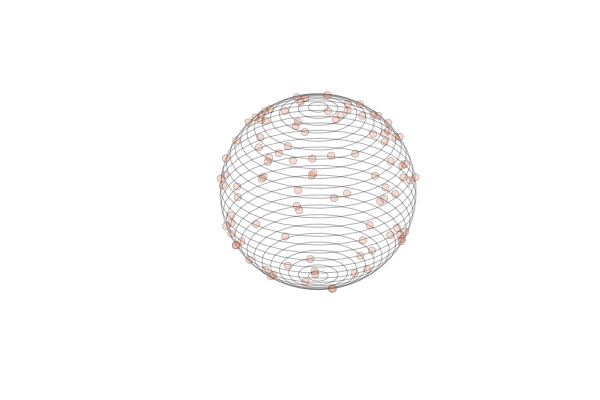

In [16]:
sample_uniform = SphereData(sample_size,"uniform")
plot_data(sample_uniform,0.25)

In [17]:
res_test_hom = apply_test(test_sphere,sample_uniform,"homogeneity")

2-element Vector{Vector{Float64}}:
 [0.539, 0.268, 0.158, 0.141]
 [0.06435476297772888, 0.0719751095056299, 0.08409247264649135, 0.07343474026927778]

In [18]:
res_test_iid = apply_test(test_sphere,sample_uniform,"iidness")

2-element Vector{Vector{Float64}}:
 [0.7, 0.802, 0.363, 0.331]
 [0.013215440222546903, 0.012955270802812054, 0.02621079624828529, 0.02542516054505234]

## 3) On the torus

In [19]:
test_torus = Test_Homogeneity(sample_size,vect_prop_near_neigh,mc_size,TorusData);

1

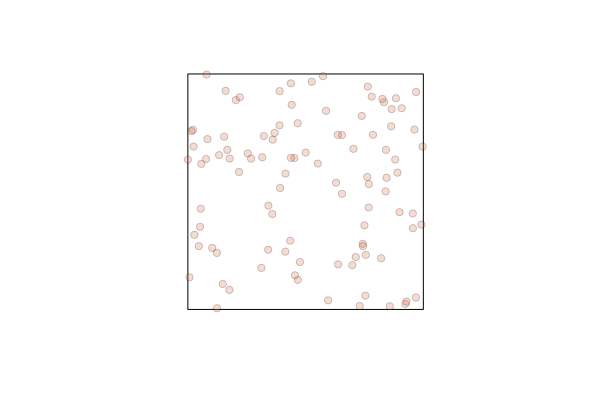

In [20]:
sample_uniform = TorusData(sample_size,"uniform")
plot_data(sample_uniform,0.25)

In [21]:
res_test_hom = apply_test(test_torus,sample_uniform,"homogeneity")

2-element Vector{Vector{Float64}}:
 [0.383, 0.118, 0.188, 0.137]
 [0.018514263214954762, 0.021567594909186857, 0.01841332724684966, 0.01492211519370363]

In [22]:
res_test_iid = apply_test(test_torus,sample_uniform,"iidness")

2-element Vector{Vector{Float64}}:
 [0.926, 0.355, 0.357, 0.17]
 [0.0026468007651673834, 0.00566621151142885, 0.005849780624604381, 0.006246050542233155]

## 4) On the Grassmannian G(3,2)

In [23]:
mc_size = 100

100

In [24]:
test_grassmann_32 = Test_Homogeneity(sample_size,vect_prop_near_neigh,mc_size,GrassmannData23);

1

In [25]:
sample_uniform = GrassmannData23(sample_size,"uniform")

GrassmannData23{Matrix{Float64}}(100, [[-0.9834228920849357 0.1802293531874888; 0.0017437956567969693 -0.10045010347005379; 0.1813184339773767 0.9784820677776753], [-0.8133437716818104 0.47879138229041207; 0.1194208039256426 -0.4185881840214374; 0.5693949250354805 0.7717141598040504], [-0.7206345741232885 0.6852348064057969; -0.38763535705823826 -0.5244256945452412; -0.5748257479762704 -0.5054017718516141], [-0.14006752968905212 0.9007065955497491; -0.10458513070966412 -0.4264576827918609; -0.9846029847411844 -0.08283401186093399], [-0.7432445561508136 0.15772064562318733; -0.4472610495828935 -0.839861584221856; 0.4975390268895379 -0.5193810906189786], [-0.053436983068992694 -0.4967041867333015; -0.8511544003743057 -0.4309968889139746; 0.5221883525739921 -0.7533436351546909], [-0.9209373359337869 0.3855378972794712; -0.2673982737813374 -0.5189607419844526; -0.2835005934066813 -0.7629156428074277], [-0.044775458578393934 -0.777390246977416; 0.8604653281861686 0.28906929682006777; -0.507

---
CAUTION :

The homogeneity test is not correct for the GrassmannData23, since the true signature is not known yet.

Please use the iidness test.

---



In [26]:
res_test_hom = apply_test(test_grassmann_32,sample_uniform,"homogeneity")

2-element Vector{Vector{Float64}}:
 [0.18, 0.36, 0.51, 0.61]
 [0.5594751533086256, 0.6585227045213264, 0.8297728864704864, 1.0003449135894764]

In [27]:
res_test_iid = apply_test(test_grassmann_32,sample_uniform,"iidness")

2-element Vector{Vector{Float64}}:
 [0.62, 0.92, 0.88, 0.42]
 [0.009721927785330375, 0.005703577758994237, 0.00435347685656684, 0.005148379270572772]

## 5) On the Grassmannian G(4,2)

In [28]:
test_grassmann_42 = Test_Homogeneity(sample_size,vect_prop_near_neigh,mc_size,GrassmannData24);

1

In [29]:
sample_uniform = GrassmannData24(sample_size,"uniform")

GrassmannData24{Matrix{Float64}}(100, [[-0.6677114670498288 -0.23923815248974484; -0.5824628655921478 -0.40576378690936843; -0.4503114308771978 0.77790604594093; -0.11008188859971275 0.4159122976239217], [-0.9303184853414652 0.16983619732498262; -0.3125362742878328 -0.550653470934164; -0.10401576123302862 0.7238501328715328; 0.16127403542218552 0.37944354806507335], [-0.006866485586501714 -0.8408309365342012; 0.18484243432427908 -0.08413073317338915; 0.00820982950462874 0.5346917792130853; -0.9827098882927098 -0.005482439664215734], [-0.9063808930541186 -0.23288107613735093; 0.38648337765071133 -0.776528514006193; -0.06532331203134081 0.04524911107545918; 0.1575980342877789 0.5837143044840716], [-0.05323247796230679 0.46156285045843726; -0.6765290897782255 -0.5036562978964314; -0.6693857646636869 0.6351151105152352; 0.3023200159424604 0.36044259606928297], [-0.5523874640005082 -0.014616338362923753; 0.6198959006284069 -0.2652996253774118; -0.4712859531593348 -0.7295783358760131; -0.297

---
CAUTION :

The homogeneity test is not correct for the GrassmannData24, since the true signature is not known yet.

Please use the iidness test.

---



In [30]:
res_test_hom = apply_test(test_grassmann_42,sample_uniform,"homogeneity")

2-element Vector{Vector{Float64}}:
 [0.72, 0.83, 0.61, 0.69]
 [0.8106365440606531, 0.8855758692910978, 1.008797686664565, 1.1249082800520098]

In [31]:
res_test_iid = apply_test(test_grassmann_42,sample_uniform,"iidness")

2-element Vector{Vector{Float64}}:
 [0.4, 0.56, 0.77, 0.67]
 [0.008375488975789365, 0.005907011621411712, 0.0030329323405771493, 0.0021371772920758206]

## 6) On the Bolza surface

In [32]:
test_bolza = Test_Homogeneity(sample_size,vect_prop_near_neigh,mc_size,BolzaData);

1

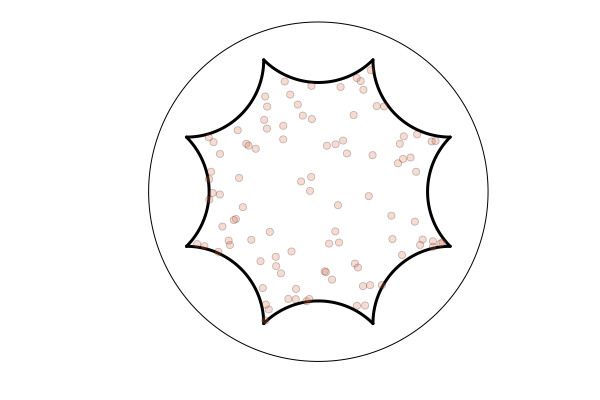

In [33]:
sample_uniform = BolzaData(sample_size,"uniform")
plot_data(sample_uniform,0.25)

In [34]:
res_test_hom = apply_test(test_bolza,sample_uniform,"homogeneity")

2-element Vector{Vector{Float64}}:
 [1.0, 0.99, 0.97, 0.55]
 [0.03774578224183564, 0.03903516687674621, 0.035240816550495074, 0.05881508719838047]

In [35]:
res_test_iid = apply_test(test_bolza,sample_uniform,"iidness")

2-element Vector{Vector{Float64}}:
 [0.01, 0.0, 0.07, 0.41]
 [0.03735540141384618, 0.041340743471604637, 0.030996599031032305, 0.016439582380003863]